In [1]:
import pandas as pd

In [3]:
customers = pd.read_csv(r'C:\Users\yashu\Downloads\Customers.csv')
products = pd.read_csv(r'C:\Users\yashu\Downloads\Products.csv')
transactions = pd.read_csv(r'C:\Users\yashu\Downloads\Transactions.csv')


In [5]:
customers

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15
...,...,...,...,...
195,C0196,Laura Watts,Europe,2022-06-07
196,C0197,Christina Harvey,Europe,2023-03-21
197,C0198,Rebecca Ray,Europe,2022-02-27
198,C0199,Andrea Jenkins,Europe,2022-12-03


In [7]:
products

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31
...,...,...,...,...
95,P096,SoundWave Headphones,Electronics,307.47
96,P097,BookWorld Cookbook,Books,319.34
97,P098,SoundWave Laptop,Electronics,299.93
98,P099,SoundWave Mystery Book,Books,354.29


In [9]:
transactions

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68
...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86


In [75]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
import numpy as np

In [77]:
merged_data = transactions.merge(customers, on="CustomerID", how="left").merge(products, on="ProductID", how="left")

In [79]:
merged_data

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86,Jacob Holt,South America,2022-01-22,SoundWave Smartwatch,Electronics,459.86
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86,Mrs. Kimberly Wright,North America,2024-04-07,SoundWave Smartwatch,Electronics,459.86
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86,Tyler Haynes,North America,2024-09-21,SoundWave Smartwatch,Electronics,459.86
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86,Joshua Hamilton,Asia,2024-11-11,SoundWave Smartwatch,Electronics,459.86


In [81]:
customer_spending = merged_data.groupby('CustomerID')['TotalValue'].sum()

In [83]:
customer_spending

CustomerID
C0001    3354.52
C0002    1862.74
C0003    2725.38
C0004    5354.88
C0005    2034.24
          ...   
C0196    4982.88
C0197    1928.65
C0198     931.83
C0199    1979.28
C0200    4758.60
Name: TotalValue, Length: 199, dtype: float64

In [85]:
avg_transaction_value = merged_data.groupby('CustomerID')['TotalValue'].mean()

In [87]:
avg_transaction_value

CustomerID
C0001     670.904000
C0002     465.685000
C0003     681.345000
C0004     669.360000
C0005     678.080000
            ...     
C0196    1245.720000
C0197     642.883333
C0198     465.915000
C0199     494.820000
C0200     951.720000
Name: TotalValue, Length: 199, dtype: float64

In [89]:
category_purchases = merged_data.groupby(['CustomerID', 'Category']).size().unstack(fill_value=0)

In [91]:
category_purchases

Category,Books,Clothing,Electronics,Home Decor
CustomerID,,,,
C0001,1,0,3,1
C0002,0,2,0,2
C0003,0,1,1,2
C0004,3,0,2,3
C0005,0,0,2,1
...,...,...,...,...
C0196,1,1,0,2
C0197,0,0,2,1
C0198,0,1,1,0


In [93]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
region_encoded = pd.DataFrame(encoder.fit_transform(customers[['Region']]), columns=encoder.get_feature_names_out(['Region']))
region_encoded.index = customers['CustomerID']

In [95]:
customer_features = pd.concat([
    customer_spending.rename("TotalSpending"),
    avg_transaction_value.rename("AvgTransactionValue"),
    category_purchases,
    region_encoded
], axis=1).fillna(0)

In [97]:
customer_features

,TotalSpending,AvgTransactionValue,Books,Clothing,Electronics,Home Decor,Region_Asia,Region_Europe,Region_North America,Region_South America
CustomerID,,,,,,,,,,
C0001,3354.52,670.904000,1.0,0.0,3.0,1.0,0.0,0.0,0.0,1.0
C0002,1862.74,465.685000,0.0,2.0,0.0,2.0,1.0,0.0,0.0,0.0
C0003,2725.38,681.345000,0.0,1.0,1.0,2.0,0.0,0.0,0.0,1.0
C0004,5354.88,669.360000,3.0,0.0,2.0,3.0,0.0,0.0,0.0,1.0
C0005,2034.24,678.080000,0.0,0.0,2.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
C0197,1928.65,642.883333,0.0,0.0,2.0,1.0,0.0,1.0,0.0,0.0
C0198,931.83,465.915000,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
C0199,1979.28,494.820000,0.0,0.0,2.0,2.0,0.0,1.0,0.0,0.0


In [99]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_features)
scaled_features_df = pd.DataFrame(scaled_features, index=customer_features.index, columns=customer_features.columns)

scaled_features_df.head()

,TotalSpending,AvgTransactionValue,Books,Clothing,Electronics,Home Decor,Region_Asia,Region_Europe,Region_North America,Region_South America
CustomerID,,,,,,,,,,
C0001,-0.051884,-0.054781,-0.314627,-1.036192,1.555406,-0.215318,-0.538816,-0.57735,-0.546536,1.545908
C0002,-0.862714,-0.903985,-1.213560,0.781689,-1.141830,0.681841,1.855921,-0.57735,-0.546536,-0.646869
C0003,-0.393842,-0.011575,-1.213560,-0.127252,-0.242751,0.681841,-0.538816,-0.57735,-0.546536,1.545908
C0004,1.035375,-0.061170,1.483240,-1.036192,0.656327,1.578999,-0.538816,-0.57735,-0.546536,1.545908
C0005,-0.769499,-0.025086,-1.213560,-1.036192,0.656327,-0.215318,1.855921,-0.57735,-0.546536,-0.646869


In [101]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics.pairwise import cosine_similarity

In [103]:
scaler = StandardScaler()
normalized_features = scaler.fit_transform(customer_features)

In [105]:
normalized_features

array([[-0.05188436, -0.05478053, -0.3146266 , ..., -0.57735027,
        -0.54653573,  1.54590766],
       [-0.86271433, -0.9039848 , -1.21355975, ..., -0.57735027,
        -0.54653573, -0.64686916],
       [-0.393842  , -0.01157526, -1.21355975, ..., -0.57735027,
        -0.54653573,  1.54590766],
       ...,
       [-0.79937112, -0.78342303, -1.21355975, ...,  1.73205081,
        -0.54653573, -0.64686916],
       [ 0.71127787,  1.1072471 , -0.3146266 , ..., -0.57735027,
        -0.54653573, -0.64686916],
       [-1.87517288, -2.8310076 , -1.21355975, ..., -0.57735027,
        -0.54653573, -0.64686916]])

In [117]:
import warnings
warnings.filterwarnings('ignore')

In [119]:
db_scores = []
k_values = range(2, 11)  # Testing k from 2 to 10
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(normalized_data)
    db_score = davies_bouldin_score(normalized_data, labels)
    db_scores.append(db_score)



In [121]:
optimal_k = k_values[db_scores.index(min(db_scores))]

In [123]:
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
final_labels = final_kmeans.fit_predict(normalized_data)

In [125]:
customer_features['Cluster'] = final_labels

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns

In [131]:
sns.set_theme(style="whitegrid")

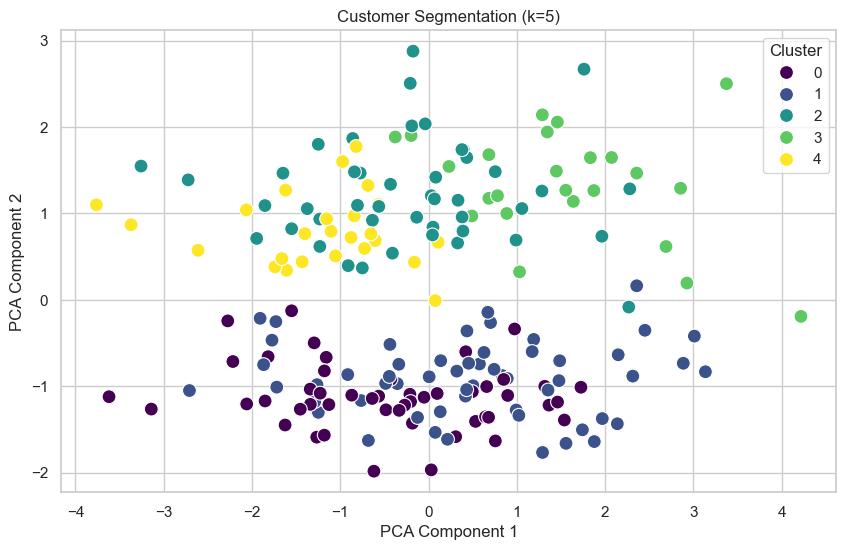

In [133]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(normalized_data)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=final_labels, palette="viridis", s=100)
plt.title(f"Customer Segmentation (k={optimal_k})")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster", loc="upper right")
plt.show()

In [135]:
print(f"Optimal k: {optimal_k}")
print(f"DB Index: {min(db_scores)}")

Optimal k: 5
DB Index: 1.3934464517156113
